In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
import scipy

In [4]:
df=pd.read_csv('customerchurn.csv')
df=pd.DataFrame(data=df)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
#lets check the shape of data
df.shape


(7043, 21)

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
#I look for missing values and try to handle them.
df.isna().sum()

#There is no missing value in the data set.

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [64]:
# I check the value_counts so any nan (just like---> ?,na, ,) data present in my data set so i detect.
def val_count(col):
    
    for i in col:
        print(df[i].value_counts())
        print('-'*40)

In [65]:
col=[ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
print(col)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [66]:
val_count(col)
#i checked no nan data present in my dataset.

Male      3555
Female    3488
Name: gender, dtype: int64
----------------------------------------
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
----------------------------------------
No     3641
Yes    3402
Name: Partner, dtype: int64
----------------------------------------
No     4933
Yes    2110
Name: Dependents, dtype: int64
----------------------------------------
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
----------------------------------------
Yes    6361
No      682
Name: PhoneService, dtype: int64
----------------------------------------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
----------------------------------------
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
----------------------------------------
No                     3498
Yes            

In [67]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64


We clearly see that target variable has imbalanced class distribution. positive (churn=Yes) is much less than negative class
(churn=No). Imbalanced class distributions influence the performance of a machine learning model negatively.

i do the unsampling or downsampling to overcome this issue.

let's first discover the features that only have two values.


In [69]:
col = df.columns
binary_col = []

for i in col:
    if df[i].value_counts().shape[0] == 2:
        binary_col.append(i)
print(binary_col)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


The remaining categorical variables have more than two values(or classes).

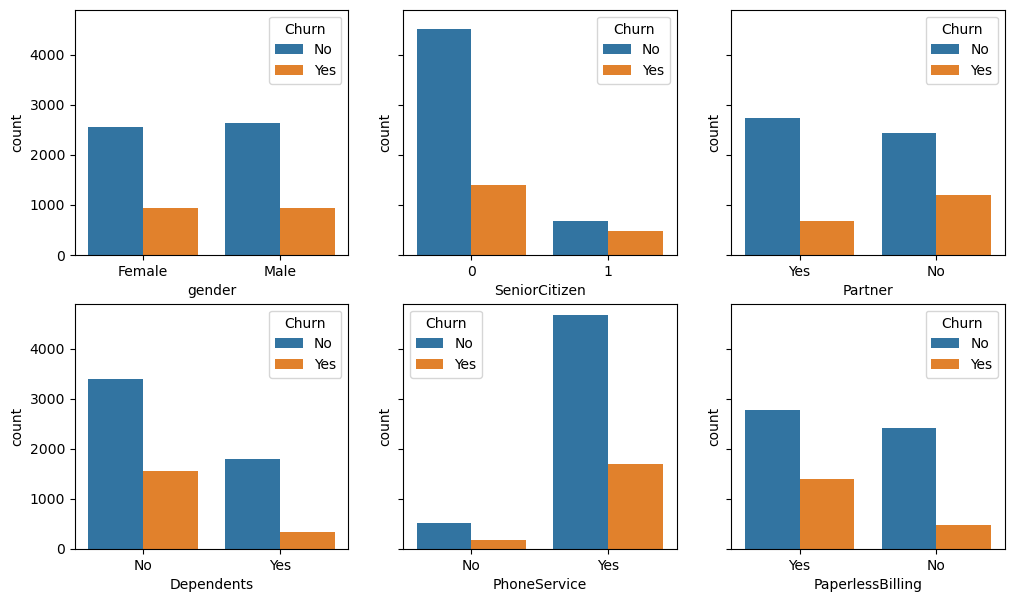

In [78]:
#Now we checking the class distribution of binary features.

fig,axes=plt.subplots(2,3, figsize=(12,7), sharey=True)


sns.countplot('gender',data=df,ax=axes[0,0],hue='Churn')
sns.countplot('SeniorCitizen',data=df,ax=axes[0,1],hue='Churn')
sns.countplot('Partner',data=df,ax=axes[0,2],hue='Churn')
sns.countplot('Dependents',data=df,ax=axes[1,0],hue='Churn')
sns.countplot('PhoneService',data=df,ax=axes[1,1],hue='Churn')
sns.countplot('PaperlessBilling',data=df,ax=axes[1,2],hue='Churn')
plt.show()

There is a high imbalance in SeniorCitizen and PhoneService variables. Most of the customers are not senior and similarly, most customers have a phone service.

In [79]:
#we are change the values of targer variable. 'Yes' will be 1 and 'No' will be 0.
churn_numeric = {'Yes':1, 'No':0}
df.Churn.replace(churn_numeric, inplace=True)

In [80]:
#let's see if churn rate is different for males and females:
df[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269209
Male,0.261603


Average churn rate for males and females are approximately the same which indicates gender variable does not bring a valuable prediction power to a model. Therefore, I will not use gender variable in the machine learning model.

Similarly, we can check other binary categorical features in terms of churn rate:

In [84]:
print(df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean())
print('-'*60)
print(df[['Partner','Churn']].groupby(['Partner']).mean())
print('-'*60)
print(df[['Dependents','Churn']].groupby(['Dependents']).mean())
print('-'*60)
print(df[['PhoneService','Churn']].groupby(['PhoneService']).mean())
print('-'*60)
print(df[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean())

                  Churn
SeniorCitizen          
0              0.236062
1              0.416813
------------------------------------------------------------
            Churn
Partner          
No       0.329580
Yes      0.196649
------------------------------------------------------------
               Churn
Dependents          
No          0.312791
Yes         0.154502
------------------------------------------------------------
                 Churn
PhoneService          
No            0.249267
Yes           0.267096
------------------------------------------------------------
                     Churn
PaperlessBilling          
No                0.163301
Yes               0.335651


The other binary features have an effect on the target variable. The phone service may also be skipped if you think 2% difference can be ignored. I have decided to use this feature in the model.

We can also use pandas pivot_table function to check the relationship between features and target variable.

In [85]:
table = pd.pivot_table(df, values='Churn', index=['gender'],
                    columns=['SeniorCitizen'], aggfunc=np.mean)
table

SeniorCitizen,0,1
gender,,
Female,0.239384,0.422535
Male,0.232808,0.411150


Other Categorical Features

we also have continuous features such as tenure, monthly charges and total charges.

Internet Services

6 variables that come with internet service which are streamingtv,StreamingMovies,OnlineSecurity, onlineBackup , DeviceProtection and Techsupport

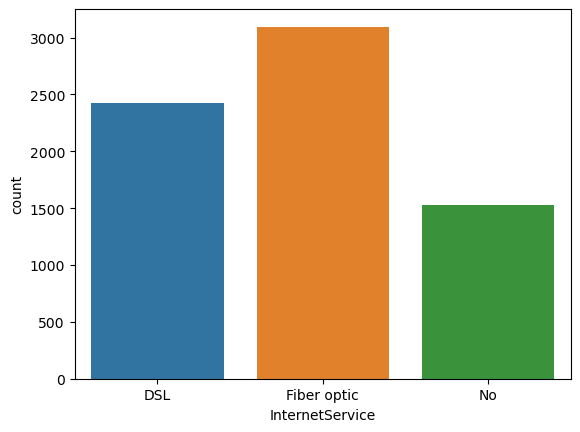

In [87]:
sns.countplot('InternetService',data=df)
plt.show()

In [88]:
df[['InternetService','Churn']].groupby('InternetService').mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


In [89]:
df[['InternetService','MonthlyCharges']].groupby('InternetService').mean()

,MonthlyCharges
InternetService,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


we are clearly see that fiber optic service is much more expensive than DSL which may be one of the reasons why customers churn.



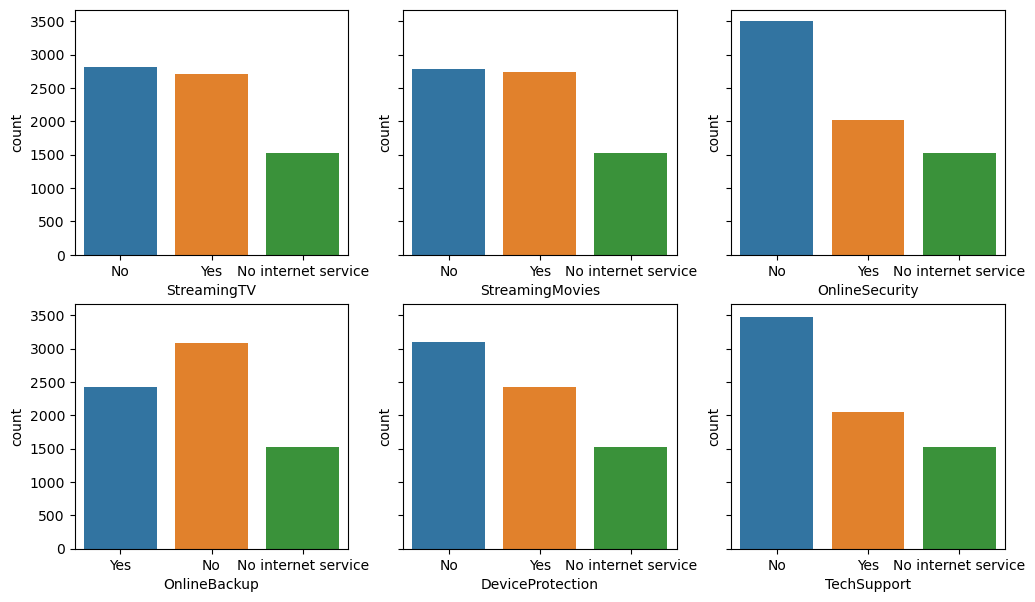

In [92]:
#lets check the distribution of internet service related variables:

fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("StreamingTV", data=df, ax=axes[0,0])
sns.countplot("StreamingMovies", data=df, ax=axes[0,1])
sns.countplot("OnlineSecurity", data=df, ax=axes[0,2])
sns.countplot("OnlineBackup", data=df, ax=axes[1,0])
sns.countplot("DeviceProtection", data=df, ax=axes[1,1])
sns.countplot("TechSupport", data=df, ax=axes[1,2])

plt.show()

In [95]:
print(df[['StreamingTV','Churn']].groupby(['StreamingTV']).mean())
print('-'*60)
print(df[['StreamingMovies','Churn']].groupby(['StreamingMovies']).mean())
print('-'*60)
print(df[['OnlineSecurity','Churn']].groupby(['OnlineSecurity']).mean())
print('-'*60)
print(df[['OnlineBackup','Churn']].groupby(['OnlineBackup']).mean())
print('-'*60)
print(df[['DeviceProtection','Churn']].groupby(['DeviceProtection']).mean())
print('-'*60)
print(df[['TechSupport','Churn']].groupby(['TechSupport']).mean())


                        Churn
StreamingTV                  
No                   0.335231
No internet service  0.074050
Yes                  0.300702
------------------------------------------------------------
                        Churn
StreamingMovies              
No                   0.336804
No internet service  0.074050
Yes                  0.299414
------------------------------------------------------------
                        Churn
OnlineSecurity               
No                   0.417667
No internet service  0.074050
Yes                  0.146112
------------------------------------------------------------
                        Churn
OnlineBackup                 
No                   0.399288
No internet service  0.074050
Yes                  0.215315
------------------------------------------------------------
                        Churn
DeviceProtection             
No                   0.391276
No internet service  0.074050
Yes                  0.225021
------

In [98]:
#Phone Service

print(df.PhoneService.value_counts())
print('-'* 40)
print(df.MultipleLines.value_counts())


Yes    6361
No      682
Name: PhoneService, dtype: int64
----------------------------------------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


If a customer does not have a phone service, he/she cannot have multiple lines. MultipleLines column includes more specific data compared to PhoneService column. So I will not include PhoneService column as I can understand the number of people who have phone service from MultipleLines column. MultipleLines column takes the PhoneService column one step further.

Let’s also check if having multiple lines changes the churn rate:



In [99]:
print(df[['MultipleLines','Churn']].groupby(['MultipleLines']).mean())

                     Churn
MultipleLines             
No                0.250442
No phone service  0.249267
Yes               0.286099


It is similar to StreamingTV and StreamingMovies variables so it is up to you to take advantage of these variables in the model. I will include them in the model

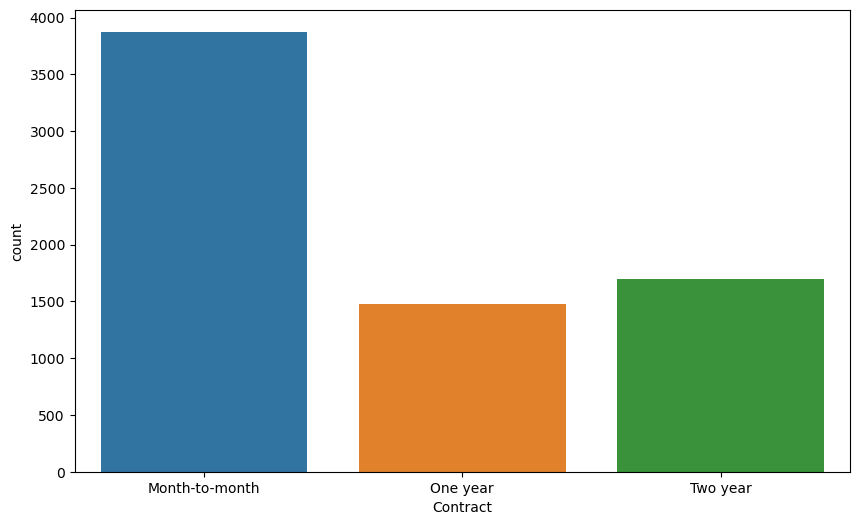

In [100]:
plt.figure(figsize=(10,6))
sns.countplot('Contract',data=df)
plt.show()

In [101]:
print(df[['Contract','Churn']].groupby(['Contract']).mean())

                   Churn
Contract                
Month-to-month  0.427097
One year        0.112695
Two year        0.028319


more likely month-to-month service. This clearly exlaings the motivation for copanis to have long term relationship with their customers.

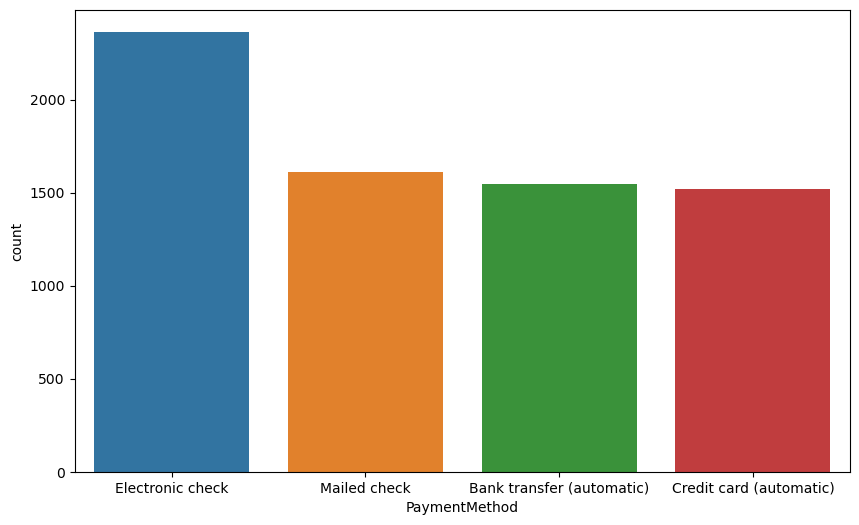

In [102]:
plt.figure(figsize=(10,6))
sns.countplot("PaymentMethod", data=df)
plt.show()

In [103]:
print(df[['PaymentMethod','Churn']].groupby(['PaymentMethod']).mean())

                              Churn
PaymentMethod                      
Bank transfer (automatic)  0.167098
Credit card (automatic)    0.152431
Electronic check           0.452854
Mailed check               0.191067


customers pay with electronic check are more likely to churn and this kind of payment is more common than other payment types.

Now lets Check continuous features

The continuous features are tenure,monthly charges and total charges.

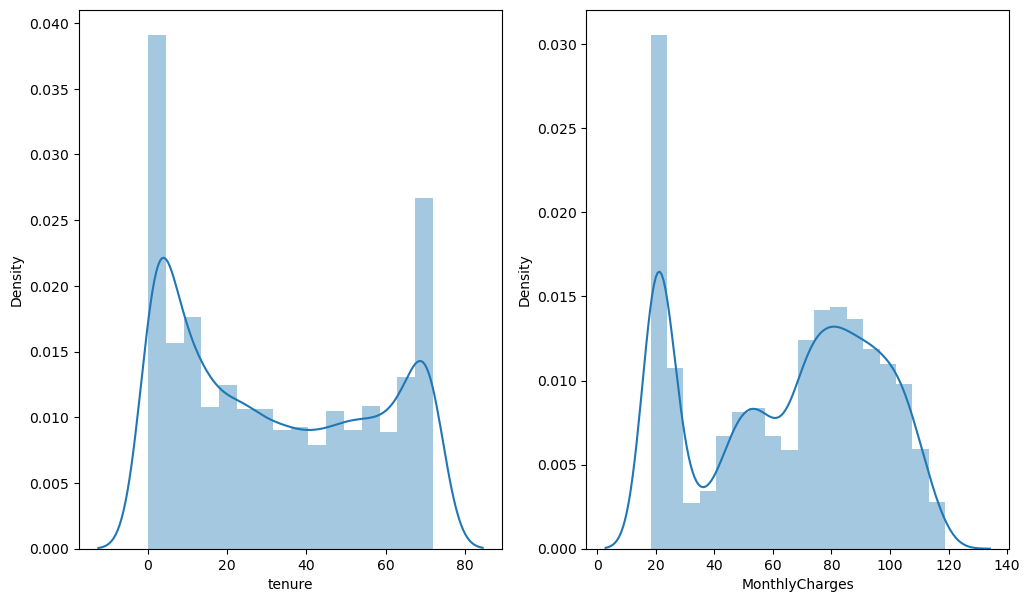

In [105]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.distplot(df["tenure"], ax=axes[0])
sns.distplot(df["MonthlyCharges"], ax=axes[1])
plt.show()

In [106]:
print(df[['tenure','MonthlyCharges','Churn']].groupby(['Churn']).mean())

          tenure  MonthlyCharges
Churn                           
0      37.569965       61.265124
1      17.979133       74.441332


It is clear that people who have been a customer for a long time tend to stay with the company. The average tenure in months for people who left the company is 20 months less than the average for people who stay.

It seems like monthly charges also have an effect on churn rate.

Contract and tenure features may be correlated because customer with long term contract are likely to stay longer with the company. Let’s figure out.

In [107]:
print(df[['Contract','tenure']].groupby(['Contract']).mean())

                   tenure
Contract                 
Month-to-month  18.036645
One year        42.044807
Two year        56.735103


As expected, contract and tenure are highly correlated. Customers with long contracts have been a customer for longer time than customers with short-term contracts. I think contract will add little to no value to tenure feature so I will not use contract feature in the model.

After exploring the variables, I have decided not to use following variable because they add little or no informative power to the model:

In [109]:
df.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)

In [110]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1


Categorical features need to be converted to numbers so that they can be included in calculations done by a machine learning model. The categorical variables in our data set are not ordinal (i.e. there is no order in them). For example, “DSL” internet service is not superior to “Fiber optic” internet service. An example for an ordinal categorical variable would be ratings from 1 to 5 or a variable with categories “bad”, “average” and “good”.

When we encode the categorical variables, a number will be assigned to each category. The category with higher numbers will be considered more important or effect the model more. Therefore, we need to do encode the variables in a way that each category will be represented by a column and the value in that column will be 0 or 1.

We also need to scale continuous variables. Otherwise, variables with higher values will be given more importance which effects the accuracy of the model.

In [111]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [114]:
#Encoding categorical variables
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
'MultipleLines', 'InternetService','OnlineSecurity'    ,  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
X = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [115]:
#Scaling continuous variables
sc = MinMaxScaler()
a = sc.fit_transform(df[['tenure']])
b = sc.fit_transform(df[['MonthlyCharges']])
X['tenure'] = a
X['MonthlyCharges'] = b

In [117]:
X.shape

(7043, 26)

Text(0.5, 1.0, 'Class Distribution Before Resampling')

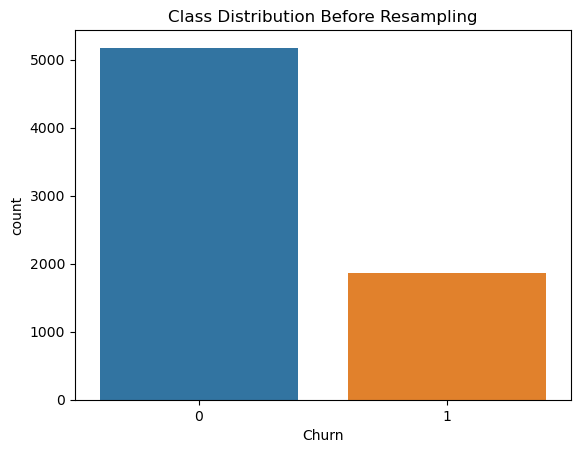

In [118]:
#lets do resampling

sns.countplot('Churn', data=df).set_title('Class Distribution Before Resampling')

In [122]:
#separating positive class (churn=yes) and negative class(churn=no):

X_no = X[X.Churn == 0]
X_yes=X[X.Churn == 1]

In [123]:
#Upsampling the positive class
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))

5174


Text(0.5, 1.0, 'Class Distribution After Resampling')

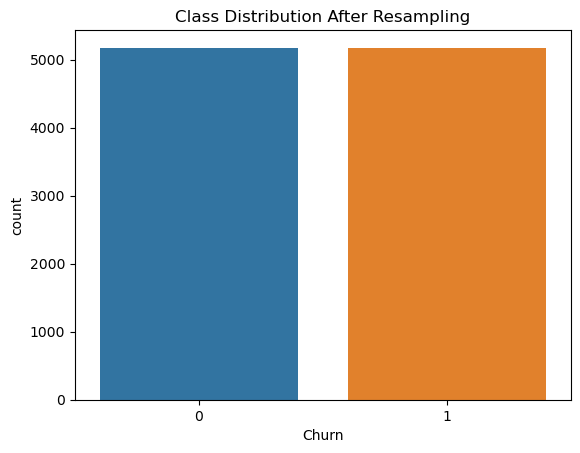

In [124]:
#Combining positive and -ve class and checking class distribution
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)
sns.countplot('Churn', data=X_upsampled).set_title('Class Distribution After Resampling')

In [125]:
#model creation and evaluation

from sklearn.model_selection import train_test_split
X = X_upsampled.drop(['Churn'], axis=1) #features (independent variables)
y = X_upsampled['Churn'] #target (dependent variable)

In [126]:
#Dividing dataset into train and test subsets:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [143]:
# def create_models(seed=2):
#     '''
#     Create a list of machine learning models.
#             Parameters:
#                     seed (integer): random seed of the models
#             Returns:
#                     models (list): list containing the models
#     '''

#     models = []
#     #models.append(('dummy_classifier', DummyClassifier(random_state=seed, strategy='most_frequent')))
#     models.append(('k_nearest_neighbors', KNeighborsClassifier()))
#     models.append(('logistic_regression', LogisticRegression(random_state=seed)))
#     models.append(('support_vector_machines', SVC(random_state=seed)))
#     models.append(('random_forest', RandomForestClassifier(random_state=seed)))
#     models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))
    
#     return models

# # create a list with all the algorithms we are going to assess
# models = create_models()

In [144]:
# # test the accuracy of each model using default hyperparameters
# results = []
# names = []
# scoring = 'accuracy'
# for name, model in models:
#     # fit the model with the training data
#     model.fit(X_train, y_train).predict(X_test)
#     # make predictions with the testing data
#     predictions = model.predict(X_test)
#     # calculate accuracy 
#     accuracy = accuracy_score(y_test, predictions)
#     # append the model name and the accuracy to the lists
#     results.append(accuracy)
#     names.append(name)
#     # print classifier accuracy
#     print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

In [145]:
lr=LogisticRegression() #Logistic Regression
knn=KNeighborsClassifier() #KNearest Neibour 
rf=RandomForestClassifier() # Random Forest
svm=SVC()              # support vactor classifier        
gd=GradientBoostingClassifier() #Gradient Boosting Classifier

model=[lr,knn,rf,svm,gd]

for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    print(m)
    predm=m.predict(X_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('-'*100)
    print('\n')

LogisticRegression()
Accuracy score of LogisticRegression() is:
0.7603864734299517
[[783 261]
 [235 791]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1044
           1       0.75      0.77      0.76      1026

    accuracy                           0.76      2070
   macro avg       0.76      0.76      0.76      2070
weighted avg       0.76      0.76      0.76      2070

----------------------------------------------------------------------------------------------------


KNeighborsClassifier()
Accuracy score of KNeighborsClassifier() is:
0.7743961352657005
[[731 313]
 [154 872]]
              precision    recall  f1-score   support

           0       0.83      0.70      0.76      1044
           1       0.74      0.85      0.79      1026

    accuracy                           0.77      2070
   macro avg       0.78      0.78      0.77      2070
weighted avg       0.78      0.77      0.77      2070

---------------------------

In [148]:
#lets check roc auc curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve
#importing the ric and auc from sklearn and predect the x_test and 
#checking the roc_auc_score
print(roc_auc_score(y_test,lr.predict(X_test)))
print(roc_auc_score(y_test,knn.predict(X_test)))

print(roc_auc_score(y_test,rf.predict(X_test)))

print(roc_auc_score(y_test,svm.predict(X_test)))
print(roc_auc_score(y_test,gd.predict(X_test)))

0.7604775828460039
0.7750470524971432
0.9097180211064059
0.7722995227532432
0.7945990455064865


In [151]:
#random forest giving the best score

885 true negatives and 997 true positive. on the other hand we can observe 188 misclassifications (159 false positive and 29 false negative)

In [155]:
#saving model
import pickle
telco_model = 'telco_model.pickle'
pickle.dump(rf,open(telco_model,'wb'))

conclusion:
    we have walked through a complete end-to-end machine learning project using the customer Churn dataset. We started by cleaning the data and analyzing it with visualization. Then, to be able to build a machine learning model, we transformed the categorical data into numeric variables (feature engineering). After transforming the data, we tried 5 different machine learning algorithms using default parameters. Finally, we tuned the hyperparameters of the Random forest Classifier (best performance model) for model optimization, obtaining an accuracy of nearly 90%.